In [1]:
#importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew

In [2]:
#removing the warnings
import warnings
warnings.filterwarnings("ignore")

In [3]:
#importing the standard library
import os
os.listdir()

['Untitled.ipynb',
 'abalone.names',
 'abalone.csv',
 'Abalone_age_Prediction.ipynb',
 '.ipynb_checkpoints',
 'abalone.data',
 'Index']

In [4]:
#make your plots the part of your notebook
%matplotlib inline

In [5]:
#importing the dataset
data=pd.read_csv("abalone.csv")
data.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [6]:
#checking the shape of the data is very important
data.shape

(4177, 9)

In [7]:
#In a More Precise way
#Very nice way to use the format method 
print("The Dataset has {} rows and {} columns".format(data.shape[0],data.shape[1]))

The Dataset has 4177 rows and 9 columns


In [8]:
#How much number of M,I,F are present in our dataset
data.Sex.value_counts()

M    1528
I    1342
F    1307
Name: Sex, dtype: int64

In [9]:
#Same as checking the Rings Count
data.Rings.value_counts()

9     689
10    634
8     568
11    487
7     391
12    267
6     259
13    203
14    126
5     115
15    103
16     67
17     58
4      57
18     42
19     32
20     26
3      15
21     14
23      9
22      6
24      2
27      2
1       1
25      1
2       1
26      1
29      1
Name: Rings, dtype: int64

In [10]:
#Set makes it sorted so easy to visualize
set(data.Rings.unique())

{1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 29}

In [11]:
#Adding the new age column and it is nothing but 1.5+rings
#Because it is the most ultimate idea that we want
#At the end we just want to drop the rings column

In [12]:
#defining the age of the Abalone
data["Age"]=data["Rings"]+1.5

In [13]:
#print the head of the dataset
data.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings,Age
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15,16.5
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7,8.5
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9,10.5
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10,11.5
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7,8.5


In [14]:
#dropping the rings column
data.drop('Rings',axis=1,inplace=True)

In [15]:
#Well required data set that we want 
data.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Age
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,16.5
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,8.5
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,10.5
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,11.5
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,8.5


In [16]:
#checking the other information about the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
Sex               4177 non-null object
Length            4177 non-null float64
Diameter          4177 non-null float64
Height            4177 non-null float64
Whole weight      4177 non-null float64
Shucked weight    4177 non-null float64
Viscera weight    4177 non-null float64
Shell weight      4177 non-null float64
Age               4177 non-null float64
dtypes: float64(8), object(1)
memory usage: 293.8+ KB


In [17]:
#describing the whole data including the non-numerical columns
#generally if you do not include the include =all it doesnot include the non numrical columns like Sex here
data.describe(include="all")

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Age
count,4177,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
unique,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,M,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1528,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,11.433684
std,NaN,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,NaN,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,2.500000
25%,NaN,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,9.500000
50%,NaN,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,10.500000
75%,NaN,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,12.500000


In [18]:
#Sex is the only categorical attribute so make this as One hot encoded

In [19]:
###Data Visualization

In [20]:
#checking for any null values
#individual sum for every column
data.isnull().sum()

Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Shucked weight    0
Viscera weight    0
Shell weight      0
Age               0
dtype: int64

In [21]:
#And this is you are just checking if any null values are there are not

In [22]:
data.isnull().any()

Sex               False
Length            False
Diameter          False
Height            False
Whole weight      False
Shucked weight    False
Viscera weight    False
Shell weight      False
Age               False
dtype: bool

In [23]:
data.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Age
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,16.5
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,8.5
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,10.5
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,11.5
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,8.5


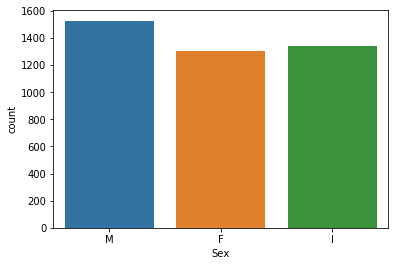

In [24]:
#Count plot Of Sex attribute
sns.countplot(data["Sex"])

In [25]:
#Samples are mostly fine there is not that much gap
#which leads to some undersampling thing

In [26]:
#Some Distribution plot

In [27]:
data["Age"].value_counts()

10.5    689
11.5    634
9.5     568
12.5    487
8.5     391
13.5    267
7.5     259
14.5    203
15.5    126
6.5     115
16.5    103
17.5     67
18.5     58
5.5      57
19.5     42
20.5     32
21.5     26
4.5      15
22.5     14
24.5      9
23.5      6
25.5      2
28.5      2
3.5       1
30.5      1
2.5       1
27.5      1
26.5      1
Name: Age, dtype: int64

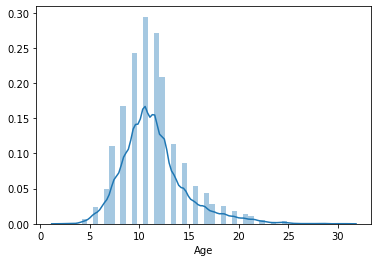

In [69]:
#Distribution plot the Age attribute
#General distribution plot
sns.distplot(data["Age"])

In [29]:
#generating the correlation matrix
corr_matrix=data.corr()

(8.0, 0.0)

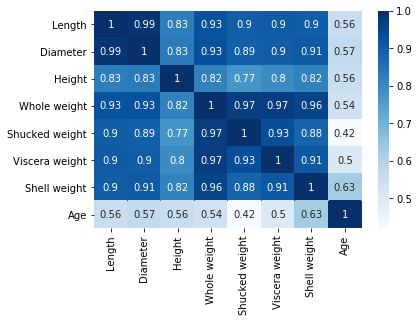

In [30]:
#Plotting the heatmap
ax=sns.heatmap(corr_matrix,annot=True,cmap="Blues")
bottom,top=ax.get_ylim()
ax.set_ylim(bottom+0.5,top-0.5)

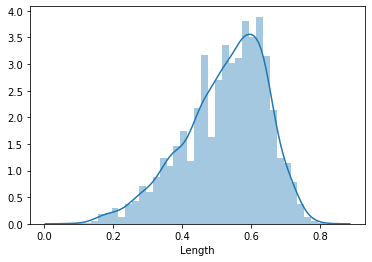

In [70]:
#Now the Distribution Plot of the Length
sns.distplot(data["Length"])

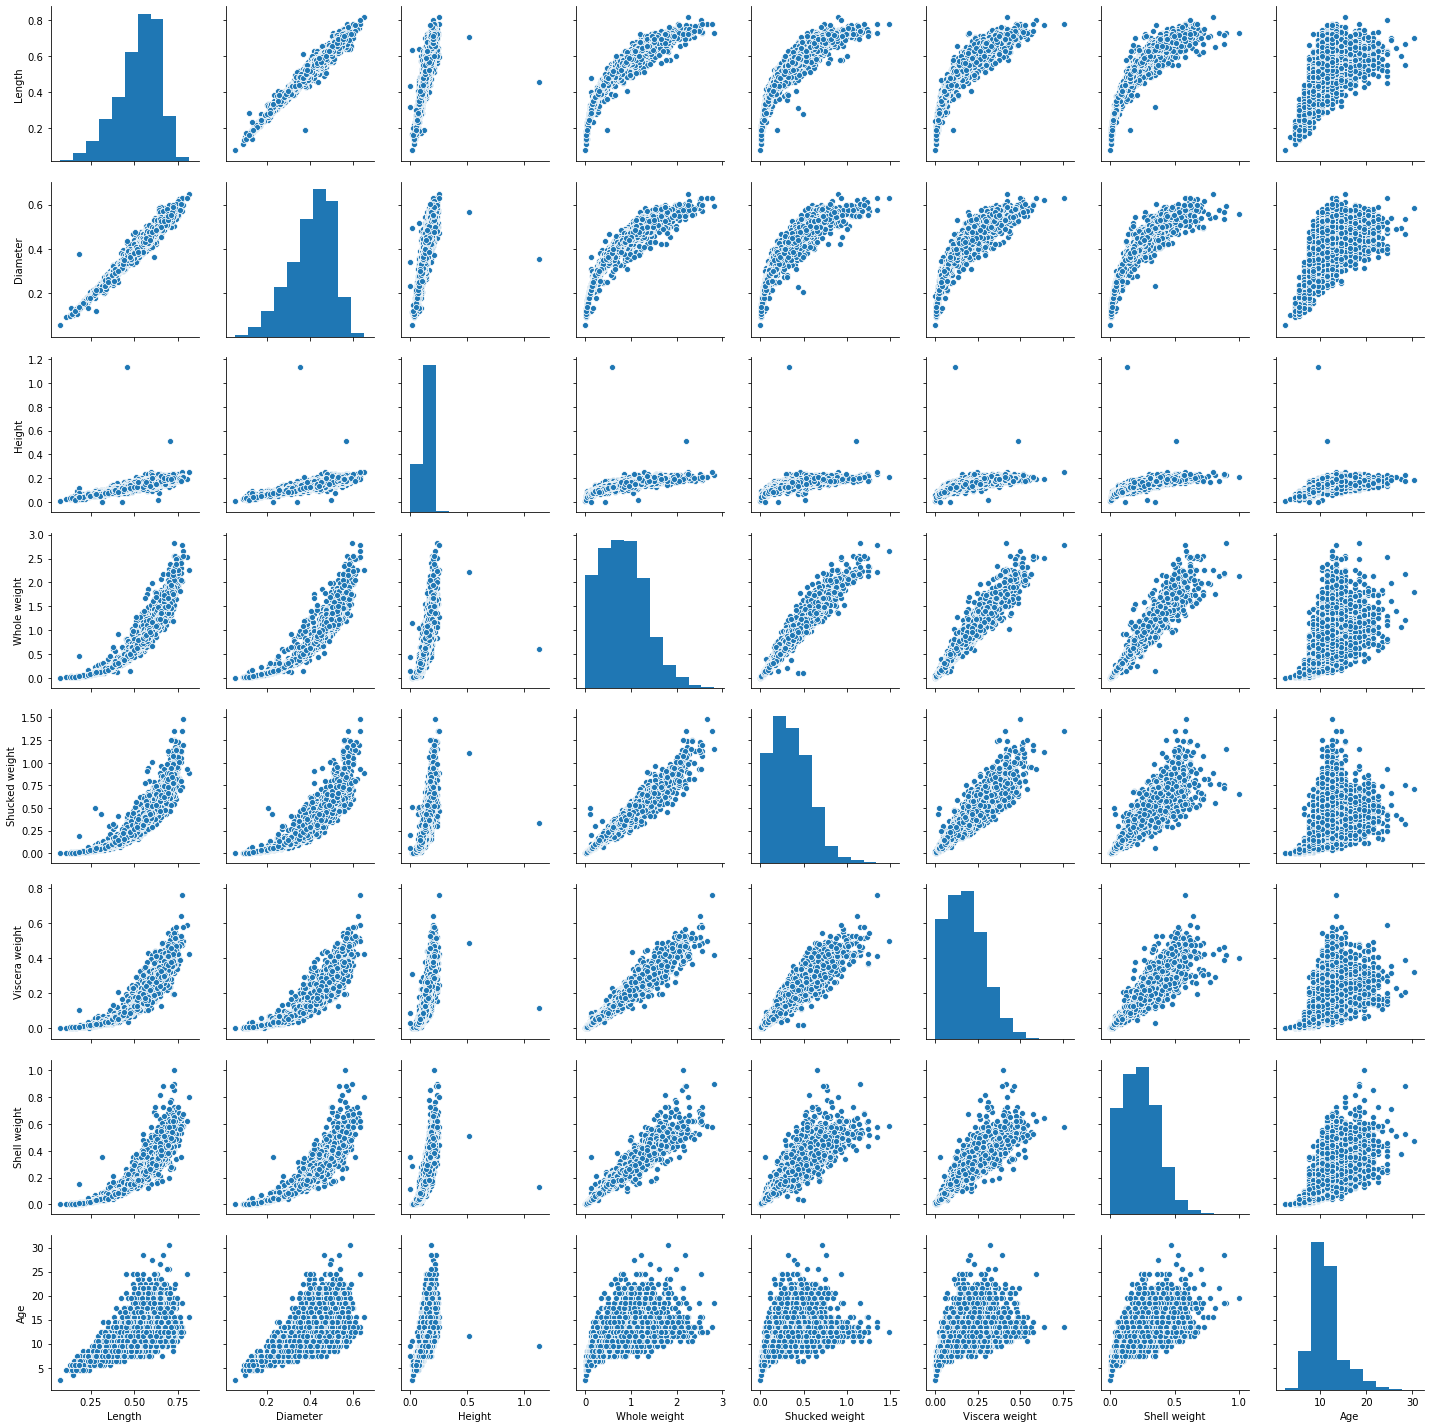

In [32]:
#Pair Plot which Includes the scatterPlot as well as the distribution plot
sns.pairplot(data)

In [33]:
#Encoding the Sex into one hot encoding if you want to build any machine learning model

In [34]:
#Talking about some machine learning model
#We need some important libraries

In [35]:
#importing some Metrics Measure
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score,mean_squared_error

In [36]:
#Now importing some ml models that you want to require to implemement the ml models

In [37]:
#Importing the Ml Models
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.svm import SVR

In [38]:
#Finding which are the numerical and which are the categorical features
numerical_features=data.select_dtypes(include=[np.number]).columns
categorical_features=data.select_dtypes(include=[np.object]).columns

In [39]:
#Seeing the columns names
data.columns

Index(['Sex', 'Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight',
       'Viscera weight', 'Shell weight', 'Age'],
      dtype='object')

In [71]:
#Grouping the Attributes by Sex attribute and finding the mean() of each attribute
data.groupby('Sex')[['Length','Diameter','Height','Whole weight','Shucked weight','Viscera weight','Shell weight','Age']].mean().sort_values('Age')

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Age
Sex,,,,,,,,
I,0.427746,0.326494,0.107996,0.431363,0.191035,0.092010,0.128182,9.390462
M,0.561391,0.439287,0.151381,0.991459,0.432946,0.215545,0.281969,12.205497
F,0.579093,0.454732,0.158011,1.046532,0.446188,0.230689,0.302010,12.629304


In [41]:
#Some Outliers checking using the BOxplot if it exist

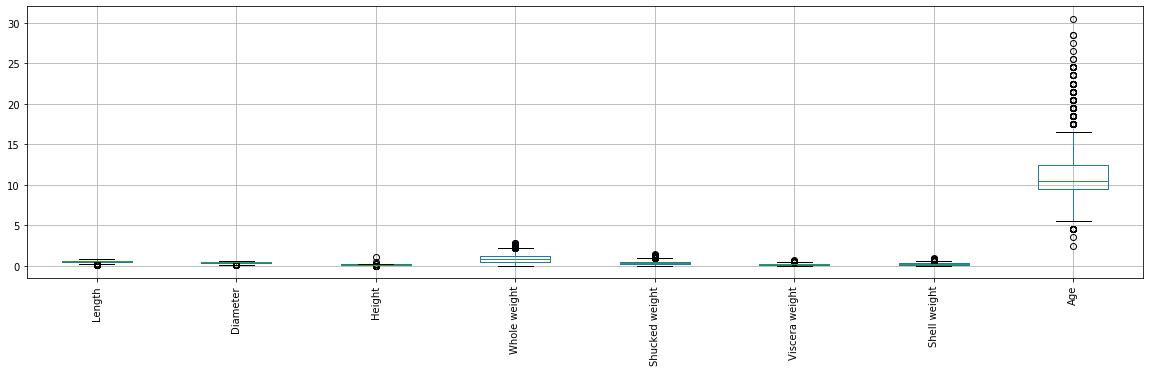

In [42]:
data.boxplot(rot=90,figsize=(20,5))

In [43]:
data["Age"]

0       16.5
1        8.5
2       10.5
3       11.5
4        8.5
        ... 
4172    12.5
4173    11.5
4174    10.5
4175    11.5
4176    13.5
Name: Age, Length: 4177, dtype: float64

In [44]:
#splitting the data
X = data.iloc[:,1:7].values
y = data.loc[:,'Age'].values

In [45]:
X

array([[0.455 , 0.365 , 0.095 , 0.514 , 0.2245, 0.101 ],
       [0.35  , 0.265 , 0.09  , 0.2255, 0.0995, 0.0485],
       [0.53  , 0.42  , 0.135 , 0.677 , 0.2565, 0.1415],
       ...,
       [0.6   , 0.475 , 0.205 , 1.176 , 0.5255, 0.2875],
       [0.625 , 0.485 , 0.15  , 1.0945, 0.531 , 0.261 ],
       [0.71  , 0.555 , 0.195 , 1.9485, 0.9455, 0.3765]])

In [46]:
y

array([16.5,  8.5, 10.5, ..., 10.5, 11.5, 13.5])

In [47]:
#Splitting into train and test data using train test split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [48]:
#Building the first Linear Regression Model

In [49]:
regressor=LinearRegression()
regressor.fit(X_train,y_train)
y_pred=regressor.predict(X_test)

In [50]:
#seeing the predicted value
y_pred

array([14.21933208, 11.09048676, 11.8390562 ,  7.06329417, 12.24642068,
       13.43234932,  9.38465476, 11.50947612,  9.90349635, 13.65899831,
       10.36118917,  7.92791118,  9.68858518, 10.4502754 ,  7.08433766,
       10.79600808,  9.13367012, 15.53970551, 12.53754082,  9.76757177,
        9.19633765,  8.76318934, 10.83126888,  8.95223314, 11.63997985,
       12.92000875,  6.07193988, 14.66686465, 12.34622251, 12.59341511,
        9.43815664,  6.0486896 , 12.56333681, 14.29506953,  9.14072917,
       10.03935518, 10.50119942, 11.80047588, 10.07693479, 12.92630425,
       13.13108285, 10.71534001, 13.36122998, 13.4629839 , 14.09620532,
       10.80739574, 10.64312509, 12.52612525, 13.34938211,  9.71192858,
       13.02253703,  9.03043571, 10.54968364, 14.92048778, 10.31166255,
        9.20309112,  7.59799126,  8.69224409,  9.25899408,  8.84948757,
       11.21792098, 10.48616166, 11.95288377,  9.71034769,  9.88917371,
       13.4704601 , 13.7763199 , 13.41533183, 10.64151515, 15.88

In [51]:
#printing the Coefficient
print(regressor.coef_)

[ -1.74783121  15.38914806  10.30242963  13.83049654 -24.36924725
 -12.96878994]


In [52]:
#Intercept of the model you build
regressor.intercept_

4.267776205508005

In [53]:
#Score that you get from your model
regressor.score(X_test,y_test)

0.5229350409847378

In [54]:
#Very low

In [55]:
#Now using the Sex Column Also
#So we have to convert them into Ohe form

In [56]:
#splitting the data
X = data.iloc[:,0:7].values
y = data.loc[:,'Age'].values

In [57]:
low_cardinality_cols = [cname for cname in data.columns if
                        data[cname].nunique() < 10 and 
                       data[cname].dtype == "object"]
numeric_cols = [cname for cname in data.columns if
                                 data[cname].dtype in ['int64','float64']]

my_cols = low_cardinality_cols + numeric_cols
abalone_predictors =data[my_cols]

In [58]:
X = pd.get_dummies(abalone_predictors)
X.drop('Age',inplace=True,axis=1)
X
y = data.loc[:,'Age'].values

In [59]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [60]:
regressor=LinearRegression()
regressor.fit(X_train,y_train)
y_pred=regressor.predict(X_test)

In [61]:
y_pred

array([14.67014483, 10.60922796, 11.85985364,  7.04120008, 12.15916033,
       13.55100358,  9.76779233, 11.59973617,  9.57089377, 13.78730504,
        9.72228608,  7.76339268,  9.9766956 , 10.80261309,  7.20767624,
       10.95939464,  9.82687786, 15.35702971, 12.59090306,  9.27985409,
        8.94406172,  8.44780239, 10.38503259,  9.4654523 , 11.01969794,
       13.06414001,  7.09707836, 14.61441854, 11.60204559, 13.09519979,
        9.95138755,  6.16462354, 12.80148049, 14.26604688,  8.65709165,
       10.13988457, 10.0200469 , 11.75020425,  9.66602336, 13.20289969,
       13.10141065, 11.06418323, 13.54986801, 13.39787512, 13.99372844,
       11.26276335, 10.7051602 , 13.33360392, 12.92857215,  9.40264847,
       13.43961315,  8.63983251, 10.90292052, 15.21258569, 10.85573394,
        9.59482073,  8.38614845,  9.3807578 ,  8.8433024 ,  8.60793707,
       11.2911508 , 10.64297012, 11.93650314,  9.10734099,  9.51110075,
       13.8951208 , 13.898778  , 13.84386704, 10.03070865, 15.81

In [62]:
regressor.score(X_test,y_test)

0.5389746671340974

In [63]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
sc.fit_transform(X_train)
sc.transform(X_test)

array([[ 0.20137301,  0.15713288,  0.34895676, ..., -0.68075349,
        -0.67745994,  1.30837711],
       [-0.21619602, -0.0956994 , -0.47232248, ..., -0.68075349,
         1.47610205, -0.76430564],
       [ 0.78596964,  0.7133639 ,  0.34895676, ..., -0.68075349,
        -0.67745994,  1.30837711],
       ...,
       [-0.67552194, -0.65193042, -0.82429929, ..., -0.68075349,
         1.47610205, -0.76430564],
       [ 0.1178592 ,  0.25826579,  0.93558479, ..., -0.68075349,
        -0.67745994,  1.30837711],
       [-2.30404114, -2.37118994, -1.88022974, ..., -0.68075349,
         1.47610205, -0.76430564]])

In [64]:
regressor=LinearRegression()
regressor.fit(X_train,y_train)
y_pred=regressor.predict(X_test)

In [65]:
y_pred

array([14.67014483, 10.60922796, 11.85985364,  7.04120008, 12.15916033,
       13.55100358,  9.76779233, 11.59973617,  9.57089377, 13.78730504,
        9.72228608,  7.76339268,  9.9766956 , 10.80261309,  7.20767624,
       10.95939464,  9.82687786, 15.35702971, 12.59090306,  9.27985409,
        8.94406172,  8.44780239, 10.38503259,  9.4654523 , 11.01969794,
       13.06414001,  7.09707836, 14.61441854, 11.60204559, 13.09519979,
        9.95138755,  6.16462354, 12.80148049, 14.26604688,  8.65709165,
       10.13988457, 10.0200469 , 11.75020425,  9.66602336, 13.20289969,
       13.10141065, 11.06418323, 13.54986801, 13.39787512, 13.99372844,
       11.26276335, 10.7051602 , 13.33360392, 12.92857215,  9.40264847,
       13.43961315,  8.63983251, 10.90292052, 15.21258569, 10.85573394,
        9.59482073,  8.38614845,  9.3807578 ,  8.8433024 ,  8.60793707,
       11.2911508 , 10.64297012, 11.93650314,  9.10734099,  9.51110075,
       13.8951208 , 13.898778  , 13.84386704, 10.03070865, 15.81

In [66]:
regressor.score(X_test,y_test)

0.5389746671340974

In [67]:
#Checking with some different regresssion Model
from sklearn.ensemble import RandomForestRegressor
regressor=RandomForestRegressor(n_estimators=100,random_state=1)
y_pred=regressor.fit(X_train,y_train)
regressor.predict(X_test)

array([16.24, 10.64, 12.86,  6.49, 12.6 , 12.99,  9.44, 10.14,  9.6 ,
       12.73,  9.72,  7.18,  9.76, 10.4 ,  7.17, 10.2 , 10.88, 16.18,
       12.57,  9.14,  8.77,  7.87, 10.4 ,  9.87, 12.73, 14.28,  5.48,
       16.62, 11.32, 16.11, 10.05,  5.43, 12.83, 14.78,  7.87,  9.36,
        9.94, 10.73,  9.28, 12.57, 12.85, 11.77, 15.6 , 14.88, 13.65,
       11.95, 10.3 , 14.5 , 16.45,  9.46, 13.77,  7.97, 10.41, 16.56,
       10.83,  9.65,  7.01, 10.29,  8.07,  8.16, 10.85, 10.26, 11.15,
        8.88,  8.8 , 13.58, 13.11, 13.58, 10.52, 15.57,  9.96, 16.59,
       12.53, 11.55, 12.21, 10.13, 12.31, 11.38, 12.53,  9.37, 11.34,
        7.08,  8.69, 14.3 , 11.7 ,  9.26, 11.1 , 14.08,  5.74,  8.26,
       10.36, 11.51,  9.33,  7.91, 15.94,  7.55, 12.1 , 10.42, 16.06,
       12.57, 11.13, 15.04, 11.69, 12.01,  6.64, 12.01,  9.22,  8.48,
       10.22, 15.49, 11.82, 12.97, 13.03, 10.39, 16.35, 11.87, 12.97,
       13.7 ,  7.71, 11.43,  8.49, 14.26,  8.2 , 10.5 , 13.45, 13.75,
       11.53, 12.28,

In [68]:
regressor.score(X_test,y_test)

0.5660148714900265

In [72]:
#Increasing the Degree of the curve in hope that it will increase the accuracy

In [87]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=4) 

feature_train = poly.fit_transform(X_train)
feature_test=poly.transform(X_test)
#print(feature_train)
#print(feature_train.shape)
poly_model = LinearRegression()
poly_model.fit(feature_train, y_train)
r2_score(y_train, poly_model.predict(feature_train)) 

#Some what improved

0.7035535854110044

In [88]:
r2_score(y_test, poly_model.predict(feature_test)) 

-0.3558475471762974

In [83]:
#Taking Ridge Regression into the Consideration
ridge_model = Ridge()
ridge_model.fit(X_train, y_train)
r2_score(y_train, ridge_model.predict(X_train)) 

0.5338469498909564

In [85]:
from sklearn.tree import DecisionTreeRegressor
tree_model = DecisionTreeRegressor()
tree_model.fit(X_train, y_train)
r2_score(y_train, tree_model.predict(X_train))  # Overfit

0.19233150835521684

In [ ]:
'''R-squared is a statistical measure of how close the data are to the fitted 
regression line. It is also known as the coefficient of determination,
or the coefficient of multiple determination for multiple regression. ... 100% 
indicates that the model explains all the variability of the response data around its mean.'''

In [ ]:
#Decision tree the high accuracy on this data but that is why we try to find out the 
#But we want to calculate the accuracy of test data

In [86]:
r2_score(y_test, tree_model.predict(X_test))  # Overfit

0.19233150835521684

In [ ]:
from sklearn.ensemble import RandomForestRegressor
random_model = RandomForestRegressor()
random_model.fit(X_train, y_train)
r2_score(X_train, random_model.predict(y_train))

In [92]:
r2_score(y_test, random_model.predict(X_test)) #Somewhat fine

0.5727847040694958

In [93]:
random_model.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'mse',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [94]:
from sklearn.model_selection import GridSearchCV

params = {
    'max_depth': [5,10, 15, 20, 25, None],    
    'min_samples_leaf': [1, 2, 4],
    'min_samples_split': [2, 5, 10],
    'n_estimators': [25, 50, 100, 200]}

grid_search = GridSearchCV(random_model, params, cv = 3,n_jobs=-1)
grid_search.fit(X_train, y_train) 

GridSearchCV(cv=3, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='deprecated', n_jo

In [96]:
grid_search.best_estimator_

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=10, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=2,
                      min_samples_split=10, min_weight_fraction_leaf=0.0,
                      n_estimators=200, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [97]:
new_random = RandomForestRegressor(max_depth=10, min_samples_leaf=1, min_samples_split=10, n_estimators= 100 )
new_random.fit(X_train, y_train)
r2_score(y_test, new_random.predict(X_test))

0.5802668761265042

In [ ]:
# So, It seems Random forest performs better among all the model we have.
# We have used Only Regression model for this kernel. We will use classification models in the next kernel